In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


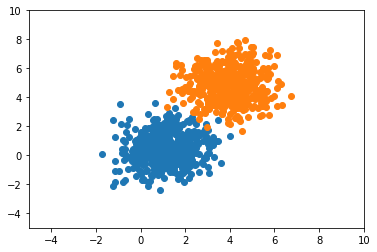

In [3]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

In [4]:
data = np.concatenate((dist_01, dist_02))
print(data.shape)

print(data.min(), data.max())

(1000, 2)
-2.41325564915 7.96771630608


In [5]:
def distance(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())

In [13]:
K = 4

clusters = {}

for ix in range(K):
    center = {
        'coords' : np.random.uniform(data.min(), data.max(), data.shape[1]),
        'history' : [],
        'points' : [],
    }
    clusters[ix] = center
print(clusters)

colors = ['red', 'yellow', 'cyan', 'orange']

{0: {'history': [], 'points': [], 'coords': array([ 2.77519093,  2.83297658])}, 1: {'history': [], 'points': [], 'coords': array([ 4.14295069,  5.32531916])}, 2: {'history': [], 'points': [], 'coords': array([ 4.62145869, -0.4290052 ])}, 3: {'history': [], 'points': [], 'coords': array([ 2.20790783, -1.19356519])}}


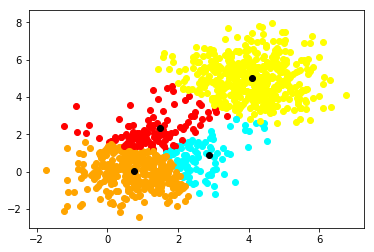

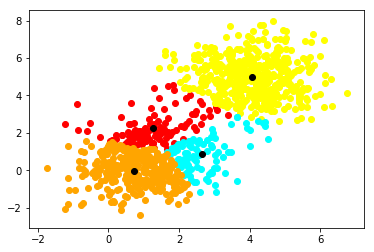

In [17]:
plt.figure(0)
for ix in range(data.shape[0]):
    d = []
    for cx in range(K):
        d.append(distance(data[ix], clusters[cx]['coords']))
    
    cluster_id = np.argmin(d)
    
    plt.scatter(data[ix, 0], data[ix, 1], color=colors[cluster_id])
                 #x-cood      #y-cood
    clusters[cluster_id]['points'].append(data[ix])
    
# Visualize cluster centers
for cx in range(K):
    plt.scatter(clusters[cx]['coords'][0], clusters[cx]['coords'][1], color='black')

plt.figure(1)
#update cluster centers
for cx in range(K):
    #update history that is previous location
    clusters[cx]['history'].append(clusters[cx]['coords'])
    
    if len(clusters[cx]['points']) is not 0:
        
        clusters[cx]['coords'] = np.asarray(clusters[cx]['points']).mean(axis=0)
        pts = np.asarray(clusters[cx]['points'])
        plt.scatter(pts[:, 0], pts[:, 1], color=colors[cx])
    plt.scatter(clusters[cx]['coords'][0], clusters[cx]['coords'][1], color='black')
    # Empty points in cluster
    clusters[cx]['points'] = []

plt.show()

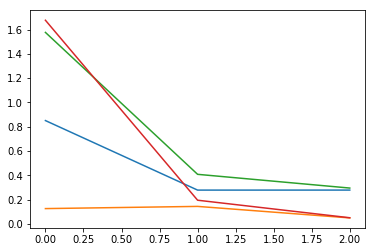

In [18]:
plt.figure(0)
for cx in range(K):
    d = []
    for pt in range(1, len(clusters[cx]['history'])):
        d.append(distance(clusters[cx]['history'][pt], clusters[cx]['history'][pt-1]))
    plt.plot(d)
plt.show()